In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def read_eval_results(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    
    data = {}
    scores = []
    current_id = 0
    # Strips the newline character
    for item in lines:
        item = item.strip()
        if 'id' in item:
            text_id = item.split(':')[1]
            data[text_id] = []
            current_id = text_id
        else:
            data[current_id].append(int(item))
            scores.append(int(item))
    return data, scores

In [37]:
def get_score_stats(scores):
    print('Number of items: ', len(scores))
    score_count = {0:0, 1:0, 2:0}
    for val in scores:
        score_count[val] += 1
    total = score_count[0] + score_count[1] + score_count[2]
    print('Num 0s: ', score_count[0])
    print('Num 1s: ', score_count[1])
    print('Num 2s: ', score_count[2])
    print('disagreement: ', score_count[1]/total)
    print('Positive ', score_count[2]/total)
    print('Negative: ', (score_count[0]+score_count[1])/total)
    return score_count

def get_eval_stats(data, scores):
    text_stats = {}
    print('TOTAL STATS: ')
    _ = get_score_stats(scores)
    for id, text_scores in data.items():
        print('text {} scores'.format(id))
        score_count = get_score_stats(text_scores)
        text_stats[id] = score_count
    return text_stats
        
        




In [38]:
# read the CA results
CA_path = './CA_grammaticality.txt'
CA_data, CA_scores = read_eval_results(CA_path)
CA_stats = get_eval_stats(CA_data, CA_scores)

TOTAL STATS: 
Number of items:  612
Num 0s:  248
Num 1s:  95
Num 2s:  269
disagreement:  0.15522875816993464
Positive  0.4395424836601307
Negative:  0.5604575163398693
text 1 scores
Number of items:  62
Num 0s:  30
Num 1s:  6
Num 2s:  26
disagreement:  0.0967741935483871
Positive  0.41935483870967744
Negative:  0.5806451612903226
text 2 scores
Number of items:  51
Num 0s:  20
Num 1s:  7
Num 2s:  24
disagreement:  0.13725490196078433
Positive  0.47058823529411764
Negative:  0.5294117647058824
text 3 scores
Number of items:  30
Num 0s:  11
Num 1s:  11
Num 2s:  8
disagreement:  0.36666666666666664
Positive  0.26666666666666666
Negative:  0.7333333333333333
text 6 scores
Number of items:  81
Num 0s:  32
Num 1s:  22
Num 2s:  27
disagreement:  0.2716049382716049
Positive  0.3333333333333333
Negative:  0.6666666666666666
text 11 scores
Number of items:  84
Num 0s:  33
Num 1s:  6
Num 2s:  45
disagreement:  0.07142857142857142
Positive  0.5357142857142857
Negative:  0.4642857142857143
text 13 s

In [39]:
# read the RC results
RC_path = './RC_grammaticality.txt'
RC_data, RC_scores = read_eval_results(RC_path)
RC_stats = get_eval_stats(RC_data, RC_scores)

TOTAL STATS: 
Number of items:  145
Num 0s:  61
Num 1s:  15
Num 2s:  69
disagreement:  0.10344827586206896
Positive  0.47586206896551725
Negative:  0.5241379310344828
text 1 scores
Number of items:  20
Num 0s:  7
Num 1s:  1
Num 2s:  12
disagreement:  0.05
Positive  0.6
Negative:  0.4
text 2 scores
Number of items:  7
Num 0s:  3
Num 1s:  1
Num 2s:  3
disagreement:  0.14285714285714285
Positive  0.42857142857142855
Negative:  0.5714285714285714
text 3 scores
Number of items:  7
Num 0s:  4
Num 1s:  0
Num 2s:  3
disagreement:  0.0
Positive  0.42857142857142855
Negative:  0.5714285714285714
text 6 scores
Number of items:  2
Num 0s:  1
Num 1s:  1
Num 2s:  0
disagreement:  0.5
Positive  0.0
Negative:  1.0
text 11 scores
Number of items:  18
Num 0s:  9
Num 1s:  4
Num 2s:  5
disagreement:  0.2222222222222222
Positive  0.2777777777777778
Negative:  0.7222222222222222
text 13 scores
Number of items:  10
Num 0s:  3
Num 1s:  1
Num 2s:  6
disagreement:  0.1
Positive  0.6
Negative:  0.4
text 17 score

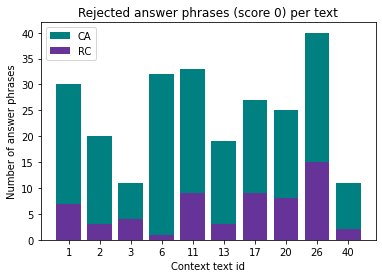

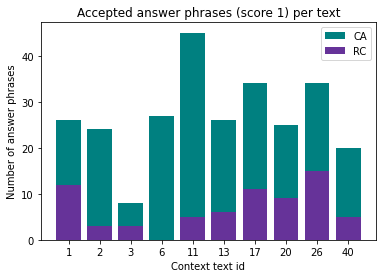

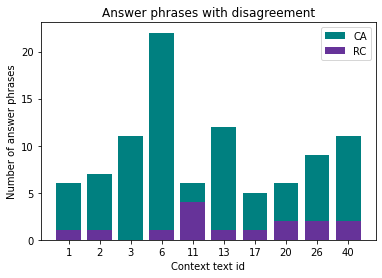

In [42]:
# plot the scores
def plot_scores(CA_keys, CA_values, RC_keys, RC_values, title):
    plt.bar(CA_keys, CA_values, color='teal', label='CA')
    plt.bar(RC_keys, RC_values, color='rebeccapurple', label='RC')
    plt.title(title)
    plt.ylabel('Number of answer phrases')
    plt.xlabel('Context text id')
    plt.legend()
    plt.show()

ca_z = []
ca_o = []
ca_t = []
rc_z = []
rc_o = []
rc_t = []
for key, val in CA_stats.items():
    ca_z.append(val[0])
    rc_z.append(RC_stats[key][0])
    ca_o.append(val[1])
    rc_o.append(RC_stats[key][1])
    ca_t.append(val[2])
    rc_t.append(RC_stats[key][2])

plot_scores(CA_stats.keys(), ca_z, RC_stats.keys(), rc_z, 'Rejected answer phrases (score 0) per text')
plot_scores(CA_stats.keys(), ca_t, RC_stats.keys(), rc_t, 'Accepted answer phrases (score 1) per text')
plot_scores(CA_stats.keys(), ca_o, RC_stats.keys(), rc_o, 'Answer phrases with disagreement')